<a href="https://colab.research.google.com/github/Fatimawojacik/-proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar ​​un dataframe de al menos 100 filas con datos aleatorios con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contiene las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Generar datos aleatorios para 100 filas
num_filas = 100
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Sánchez", "Romero", "Gómez"]
nombres = ["Juan", "María", "José", "Laura", "Carlos", "Ana", "Pedro", "Sofía", "Diego", "Martina"]
datos = []

for _ in range(num_filas):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = round(random.uniform(1, 10), 2)
  nota_2do_trimestre = round(random.uniform(1, 10), 2)
  nota_3er_trimestre = round(random.uniform(1, 10), 2)
  faltas = random.randint(0, 15)

  datos.append([apellido, nombre, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,González,María,13328830,Informática,9.04,9.44,8.34,11
1,Gómez,Sofía,28663675,Sociología,7.39,8.84,4.25,9
2,Gómez,Laura,64716440,Lengua y Literatura,3.30,5.70,7.33,5
3,Gómez,Diego,76240703,Física,5.45,7.64,4.93,2
4,García,Sofía,25427530,Física,6.11,4.17,7.60,7
...,...,...,...,...,...,...,...,...
95,Sánchez,Diego,63118410,Matemática,9.12,6.35,8.87,7
96,Sánchez,Martina,83761475,Arte,1.22,3.00,8.77,15
97,Martínez,Sofía,99416780,Arte,8.74,7.91,8.35,14
98,Martínez,Martina,24674324,Matemática,5.61,8.55,9.77,1


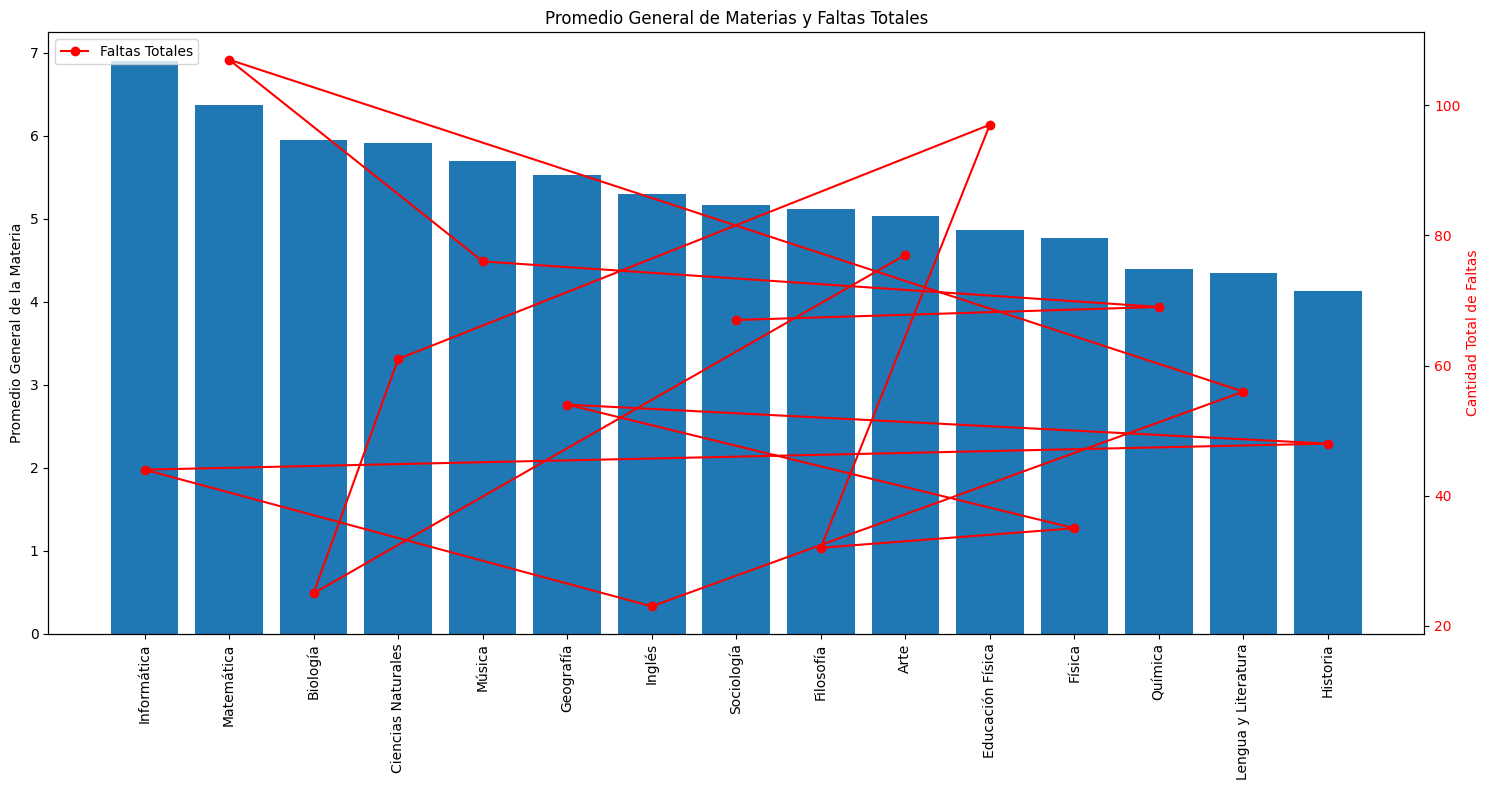

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(111)
ax1.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.ylabel('Promedio General de la Materia')
plt.title('Promedio General de Materias y Faltas Totales')

# Agregar un segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Cantidad Total de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyenda
plt.legend(['Faltas Totales'], loc='upper left')

plt.tight_layout()
plt.show()

In [6]:
df.to_csv("datos_alumnos.csv", index=False)